__Importing the useful libraries.__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_raw = pd.read_csv('loan.csv') # reading the data set

# Cleaning the data

*This step is most important step for any analysis process. Down below we will drop all the unwanted columns, change format of few columns for making our life easier. We will try to extract new columns based on the existing columns for more insighs.*

In [3]:
data_raw.isnull().sum() # returns list of columns with the number of null values in them.

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [4]:
missing_columns = data_raw.columns[100*(data_raw.isnull().sum()/len(data_raw.index)) > 90] 
# we are trying to fetch all the columns with more them 90% of the null values. We can drop them as they won't give
# Any insighs for the analyis.

In [5]:
print(missing_columns)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [6]:
print(len(missing_columns)) # finding the total number of columns with more than 90% of null values.

56


We observed  56 columns are having more than 90 % of the null values which will not help us in analysing the data so we are dropping them.

In [7]:
df2 = data_raw.drop(missing_columns, axis=1) # dropping the nulls

In [8]:
df2.info() # gives a glimse of all the columns in the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [9]:
df2.head # gives glimse of all data present in the dataset.

<bound method NDFrame.head of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ... last_pymnt_amnt  \
0       36 months   10.65%       162.87     B    

*With above comand we can understand we have many columns with only one value which can be droped as they will not impact the analysis*

In [10]:
for column in df2.columns:
    print(column,":",len(df2[column].unique()))
# This will give the list of columns and the number unique values in each column.

id : 39717
member_id : 39717
loan_amnt : 885
funded_amnt : 1041
funded_amnt_inv : 8205
term : 2
int_rate : 371
installment : 15383
grade : 7
sub_grade : 35
emp_title : 28821
emp_length : 12
home_ownership : 5
annual_inc : 5318
verification_status : 3
issue_d : 55
loan_status : 3
pymnt_plan : 1
url : 39717
desc : 26528
purpose : 14
title : 19616
zip_code : 823
addr_state : 50
dti : 2868
delinq_2yrs : 11
earliest_cr_line : 526
inq_last_6mths : 9
mths_since_last_delinq : 96
open_acc : 40
pub_rec : 5
revol_bal : 21711
revol_util : 1090
total_acc : 82
initial_list_status : 1
out_prncp : 1137
out_prncp_inv : 1138
total_pymnt : 37850
total_pymnt_inv : 37518
total_rec_prncp : 7976
total_rec_int : 35148
total_rec_late_fee : 1356
recoveries : 4040
collection_recovery_fee : 2616
last_pymnt_d : 102
last_pymnt_amnt : 34930
last_credit_pull_d : 107
collections_12_mths_ex_med : 2
policy_code : 1
application_type : 1
acc_now_delinq : 1
chargeoff_within_12_mths : 2
delinq_amnt : 1
pub_rec_bankruptcies 

If the column has only one unique values that columns will not make any sense for anlysis so we can drop them.

In [11]:
for column in df2.columns:
    if len(df2[column].unique())==1:
        df2 = df2.drop(column, axis=1) 

In [12]:
print("Shape of the dataset after droping the columns with only one unique value",df2.shape)

Shape of the dataset after droping the columns with only one unique value (39717, 49)


In [13]:
df2.head

<bound method NDFrame.head of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ...   
1

From the above comand we can see pub_rec_bankruptcies, tax_liens, collections_12_mths_ex_med,chargeoff_within_12_mths this can also be droped as NaN or zero will not give any idea. Let us try to find the columns which are having only 0 and nan in below cell

In [14]:
for column in df2.columns:
    if(len(df2[column].unique())==2):
        print(column, ":", len(df2[column].unique()))
        print(column, ":", df2[column].unique())

term : 2
term : [' 36 months' ' 60 months']
collections_12_mths_ex_med : 2
collections_12_mths_ex_med : [ 0. nan]
chargeoff_within_12_mths : 2
chargeoff_within_12_mths : [ 0. nan]
tax_liens : 2
tax_liens : [ 0. nan]


From the above analysis we can understand that only collections_12_mths_ex_med, chargeoff_within_12_mths, tax_liens columns are having 0 and nan values so we can drop them.

In [15]:
arr = ["tax_liens", "collections_12_mths_ex_med","chargeoff_within_12_mths"]   
df2 = df2.drop(arr, axis=1)

In [16]:
print("Shape of the dataset after droping columns with only 0 and nans",df2.shape)

Shape of the dataset after droping columns with only 0 and nans (39717, 46)


As customer behavior values are unknown during the application time, doing analysis with them will not help the lender to predict the outcome of customer as defaulter of fully paid.

In [17]:
behaviour_var =  [
    "id",
    "member_id",
    "desc",
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d"]

In [18]:
df2 = df2.drop(behaviour_var, axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               39717 non-null  int64  
 1   funded_amnt             39717 non-null  int64  
 2   funded_amnt_inv         39717 non-null  float64
 3   term                    39717 non-null  object 
 4   int_rate                39717 non-null  object 
 5   installment             39717 non-null  float64
 6   grade                   39717 non-null  object 
 7   sub_grade               39717 non-null  object 
 8   emp_title               37258 non-null  object 
 9   emp_length              38642 non-null  object 
 10  home_ownership          39717 non-null  object 
 11  annual_inc              39717 non-null  float64
 12  verification_status     39717 non-null  object 
 13  issue_d                 39717 non-null  object 
 14  loan_status             39717 non-null

In [19]:
unwanted_columns = ["url","title","zip_code"] 
# we found these coulumns are also not nessasary for the analyis so droping them.
# we cant do any analysis on URL as the URL is from the lending company and it similar with only id change in the query parameter.
# title we see we have lot of missing values in the loan title and we also have purpose for analysis so droppping the title.
# Zip code we can't find any usefull insight so we are dropping them and we also have the state code if we need to do a analysis based on geoloaction.

In [20]:
df2 = df2.drop(unwanted_columns, axis=1)

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               39717 non-null  int64  
 1   funded_amnt             39717 non-null  int64  
 2   funded_amnt_inv         39717 non-null  float64
 3   term                    39717 non-null  object 
 4   int_rate                39717 non-null  object 
 5   installment             39717 non-null  float64
 6   grade                   39717 non-null  object 
 7   sub_grade               39717 non-null  object 
 8   emp_title               37258 non-null  object 
 9   emp_length              38642 non-null  object 
 10  home_ownership          39717 non-null  object 
 11  annual_inc              39717 non-null  float64
 12  verification_status     39717 non-null  object 
 13  issue_d                 39717 non-null  object 
 14  loan_status             39717 non-null

__*We have droped most of the unwanted columns now we can extract new columns for better analysis*__

Converting and assiging the emp length to new variable.

In [22]:
import re # importing regex
def extract_num(k):
    values=re.findall(r'\d+',str(k)) # using regex to extract the req text from the string data
#     print(values)
    if len(values)==0:
        return 0
    else:
        return int(values[0])

df2['emp_length_years'] = df2['emp_length'].map(extract_num) # new function using map.

In [23]:
df2['emp_length_years'] # we can analyis the data based oon the employee experience

0        10
1         1
2        10
3        10
4         1
         ..
39712     4
39713     3
39714     1
39715     1
39716     1
Name: emp_length_years, Length: 39717, dtype: int64

Extracting the month and year from the issue_d column.

In [24]:
from datetime import datetime
df2['issue_d'] = df2['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))  # converting to date time format

Creating new month and year columns

In [25]:
df2['month'] = df2['issue_d'].apply(lambda x: x.month) # creating new column month from issue_d
df2['year'] = df2['issue_d'].apply(lambda x: x.year) # creating new column year from issue_d

Converting the intrest rate into numeric

In [26]:
df2['int_rate'] = df2['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [27]:
df2["term"]

0         36 months
1         60 months
2         36 months
3         36 months
4         60 months
            ...    
39712     36 months
39713     36 months
39714     36 months
39715     36 months
39716     36 months
Name: term, Length: 39717, dtype: object

In [28]:
df2["term"].unique()

array([' 36 months', ' 60 months'], dtype=object)

From above cell we can see we have only 2 terms available so we need not to modify them

In [29]:
df2['loan_status'] = df2['loan_status'].astype('category')
df2['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

We have current as inly 1140 and current will not give any clarity on if the user defaulter or not.

In [30]:
# filtering only fully paid or charged-off
df2 = df2[df2['loan_status'] != 'Current']

# for making the analysis easy we are converting the fully paid to 0 and charged-off to 1 
df2['loan_status'] = df2['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
df2['loan_status'] = df2['loan_status'].apply(lambda x: pd.to_numeric(x))

# summarising the values
df2['loan_status'].value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   loan_amnt               38577 non-null  int64         
 1   funded_amnt             38577 non-null  int64         
 2   funded_amnt_inv         38577 non-null  float64       
 3   term                    38577 non-null  object        
 4   int_rate                38577 non-null  float64       
 5   installment             38577 non-null  float64       
 6   grade                   38577 non-null  object        
 7   sub_grade               38577 non-null  object        
 8   emp_title               36191 non-null  object        
 9   emp_length              37544 non-null  object        
 10  home_ownership          38577 non-null  object        
 11  annual_inc              38577 non-null  float64       
 12  verification_status     38577 non-null  object

From the above checks we have converted all the required columns to useable formats. 

In [32]:
df2['loan_status'].value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

In [33]:
data = df2.copy() # creating a copy of df2 just to keep the clean dataset for any further analysis with number.
# we might change the data set based on the requirement but we can'trevert back so having a copy.

# Univariate analysis

Text(0.5, 1.0, 'Bar Plot of Loan Status with Percentages')

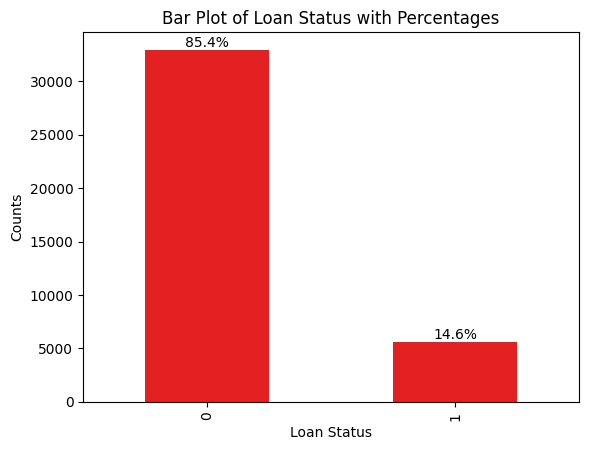

In [34]:
ax = data['loan_status'].value_counts().plot.bar(color='#E32022') # creating a bar plot using the matplot lib library.
total_count = len(data['loan_status']) # finding the total count for adding the percentages as annotation.
# creating the annotations
for p in ax.patches:
    percentage = p.get_height() / total_count * 100
    ax.annotate(f"{percentage:.1f}%", 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')
# Labels for the plot.
plt.xlabel('Loan Status')
plt.ylabel('Counts')
plt.title('Bar Plot of Loan Status with Percentages')

__*Based on the analysis of the predictor variable status we have 85.4 % of the applicants fully paid the loan where as the 14.6% of the application as charged-off.*__

Text(0.5, 1.0, 'Bar Plot of grade and count with Percentages')

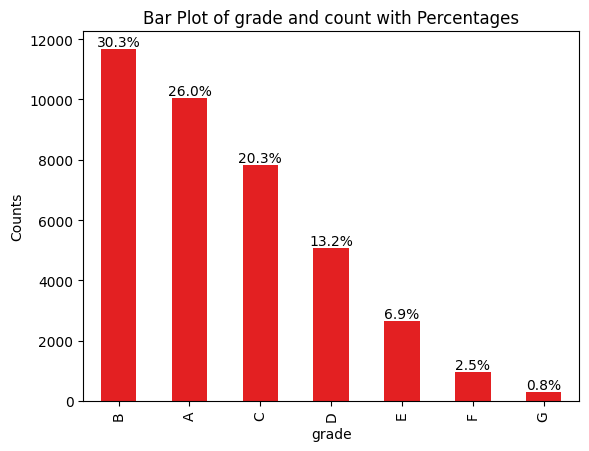

In [35]:
ax_grade = data['grade'].value_counts().plot.bar(color='#E32022')
# sns.countplot(df['grade'])
total_count = len(data['grade'])
for p in ax_grade.patches:
    percentage = p.get_height() / total_count * 100
    ax_grade.annotate(f"{percentage:.1f}%", 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')
plt.xlabel('grade')
plt.ylabel('Counts')
plt.title('Bar Plot of grade and count with Percentages')

__*From the bar chart, we can observe that the applicants with grade B have applied for the loan frequently. The applicants with grade G applied for the least number.*__

<AxesSubplot: xlabel='loan_amnt', ylabel='Density'>

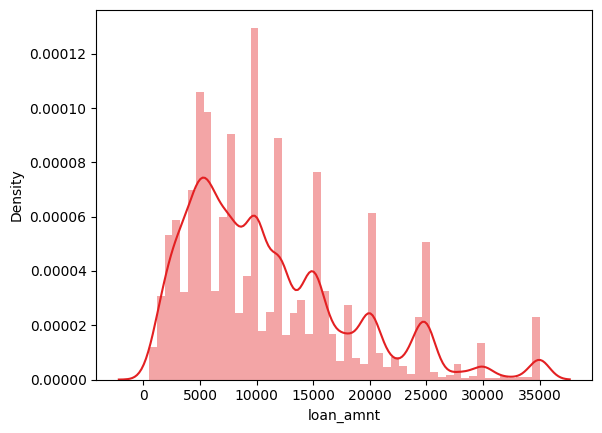

In [36]:
sns.distplot(data['loan_amnt'],color= "#E32022") # dist plot to understand how the loan amount is distributed.

__*From the above distribution chart, we can observe most of the loan amounts distributed around 5000.*__

<AxesSubplot: xlabel='int_rate', ylabel='Density'>

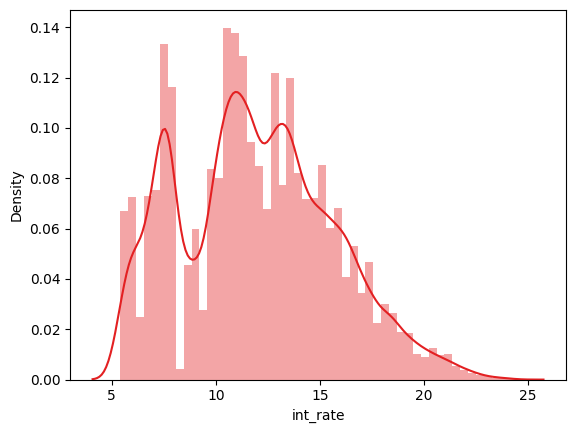

In [37]:
sns.distplot(data['int_rate'],color="#E32022") # dist plot to understand how the interst rate is distributed.

__*From the above distribution chart, we can observe most of the loan interests are distributed around 7.5 or 12.5*__

# Bivariate analysis

*In Bivariate analysis we try to understand the relation of 2 variables.*

We know that our main analysis based on the loan status so we can create a function for creating bar plots for reducing the re use of the same code.

In [38]:
def plot_cat(cat_var):
    sns.barplot(x=cat_var, y='loan_status', data=data,color="#E32022") # cat_var is the variable and loan status is the const throught out all graphs
    plt.show()

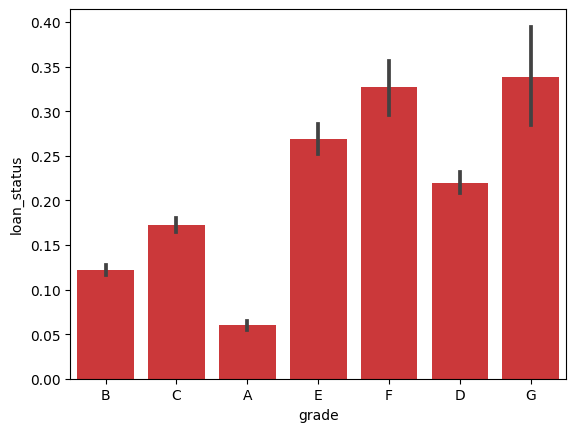

In [39]:
plot_cat('grade') # We are passing the grade as a arg for a plot_cat 

__*From the figure its evident that the applicants with the lowest grades `G` are more likely be the defaulters. And the applicants with high grade `A` are most likely to payoff the loan.*__

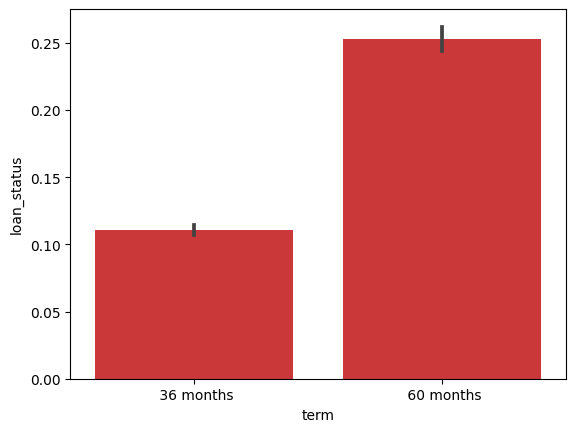

In [40]:
plot_cat('term') # We are passing the trem as a arg for a plot_cat by this we can understand the behaviour of the applicant based on the term.

__*Loans with short duration are more likely to be repaid but the loans with the longer duration are being the defaulters. The reason could be the mindset of the applicant might change or even his economic status can also change which could be the reason for the more defaulters.*__

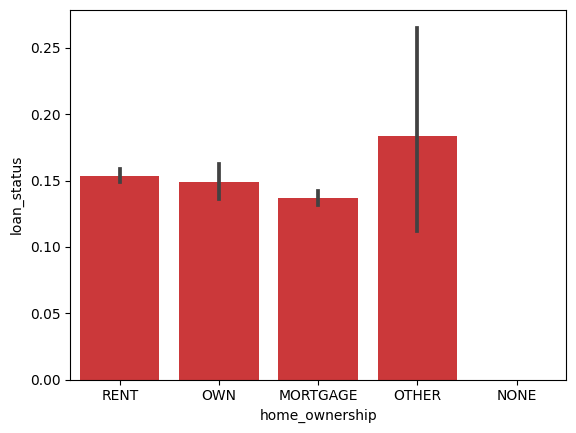

In [41]:
plot_cat('home_ownership') # We are passing the home_ownership as a arg for a plot_cat 

__*In the above plot we are not able to find any insight as other can't be a proper value to diffrentiate.*__

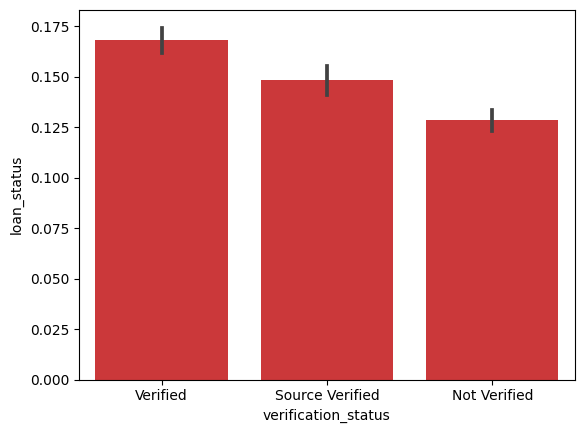

In [42]:
plot_cat('verification_status') # We are passing the verification_status as a arg for a plot_cat 

__*surprisingly, verified loans default more than not verified*__

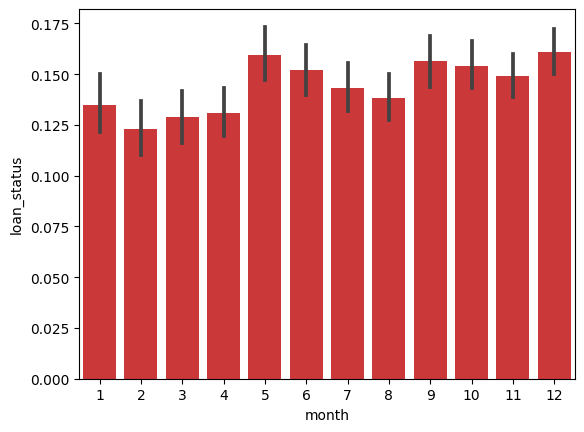

In [43]:
plot_cat('month') # We are passing the month as a arg for a plot_cat 

__*We observe a more number of defaulters in the months of `5,6, 9, 10, 11, and 12`. The reasons is because the high school and college admissions.*__

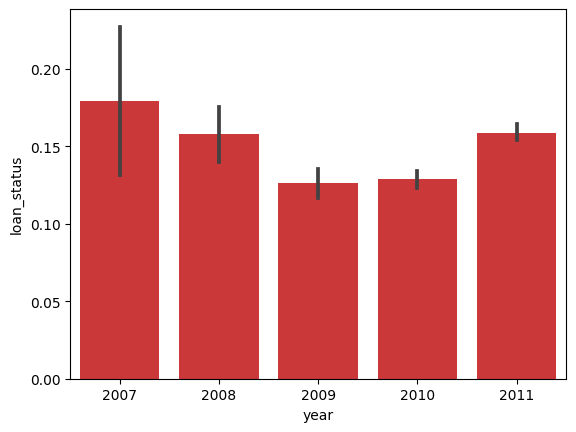

In [44]:
plot_cat('year') # We are passing the year as a arg for a plot_cat 

__*We observer their is a significant decrease in the defaulters from 2007 to 2010 but we have a peak in 2011*__

### Till now we have done the analysis only based on the values avaiable, lets try to bind the values.

*For binnnig the values we will be creating the functions and apply those function to chnage the values in the dataset*

In [45]:
# binning loan amount considering all the loan values into 4 sets 
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
data['loan_amnt'] = data['loan_amnt'].apply(lambda x: loan_amount(x))

In [46]:
data['loan_amnt'].value_counts() # counting the values for each segment or bin.

medium       20675
high          7696
low           7444
very high     2762
Name: loan_amnt, dtype: int64

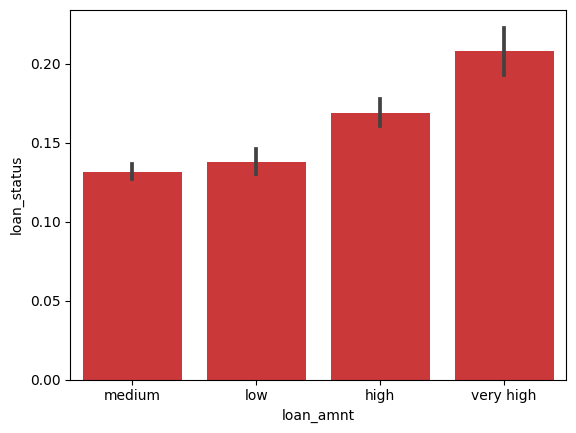

In [47]:
plot_cat('loan_amnt') # We are passing the loan_amnt as a arg for a plot_cat 

__*The applicants with high loan amounts i.e. more than 25k are more likely be defaulters.*__

In [48]:
# lets also convert interest rate to low, medium, high
# binning Intrest rate.
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
data['int_rate'] = data['int_rate'].apply(lambda x: int_rate(x))

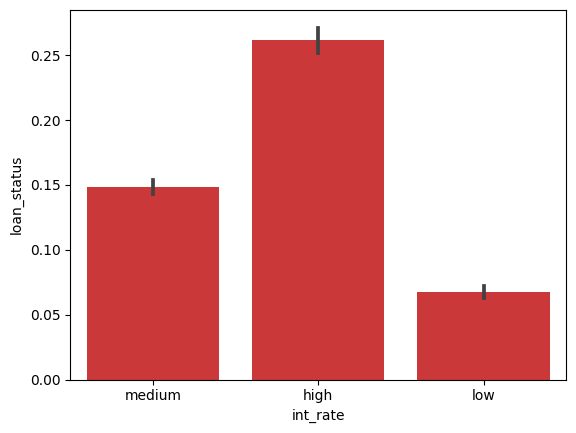

In [49]:
plot_cat('int_rate')

__*The applicants with high interest rates i.e. more than 15% are more likely to be defaulters.*__

In [50]:
# binning Intrest annual income
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

data['annual_inc'] = data['annual_inc'].apply(lambda x: annual_income(x))

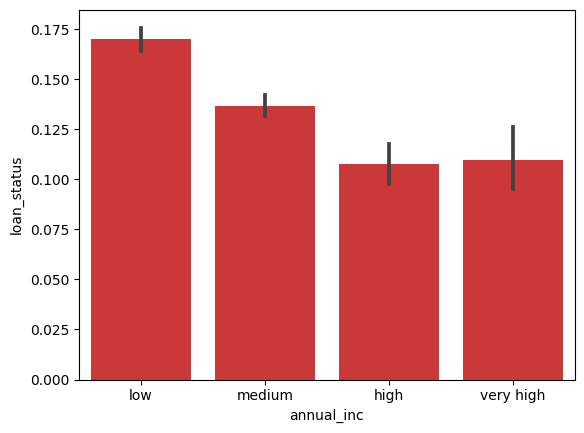

In [51]:
plot_cat('annual_inc')

__*The applicants with low annual income i.e. more than 50k are more likely to be defaulters.*__

In [52]:
# installment
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
data['installment'] = data['installment'].apply(lambda x: installment(x))

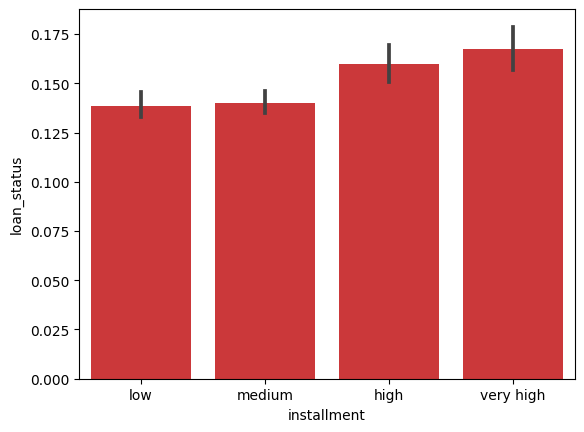

In [53]:
# comparing default rates across installment
# the higher the installment amount, the higher the default rate
plot_cat('installment')

__*From the above fig we see the if the intrest amount is hight the defaulters are more*__

# Segmented analysis

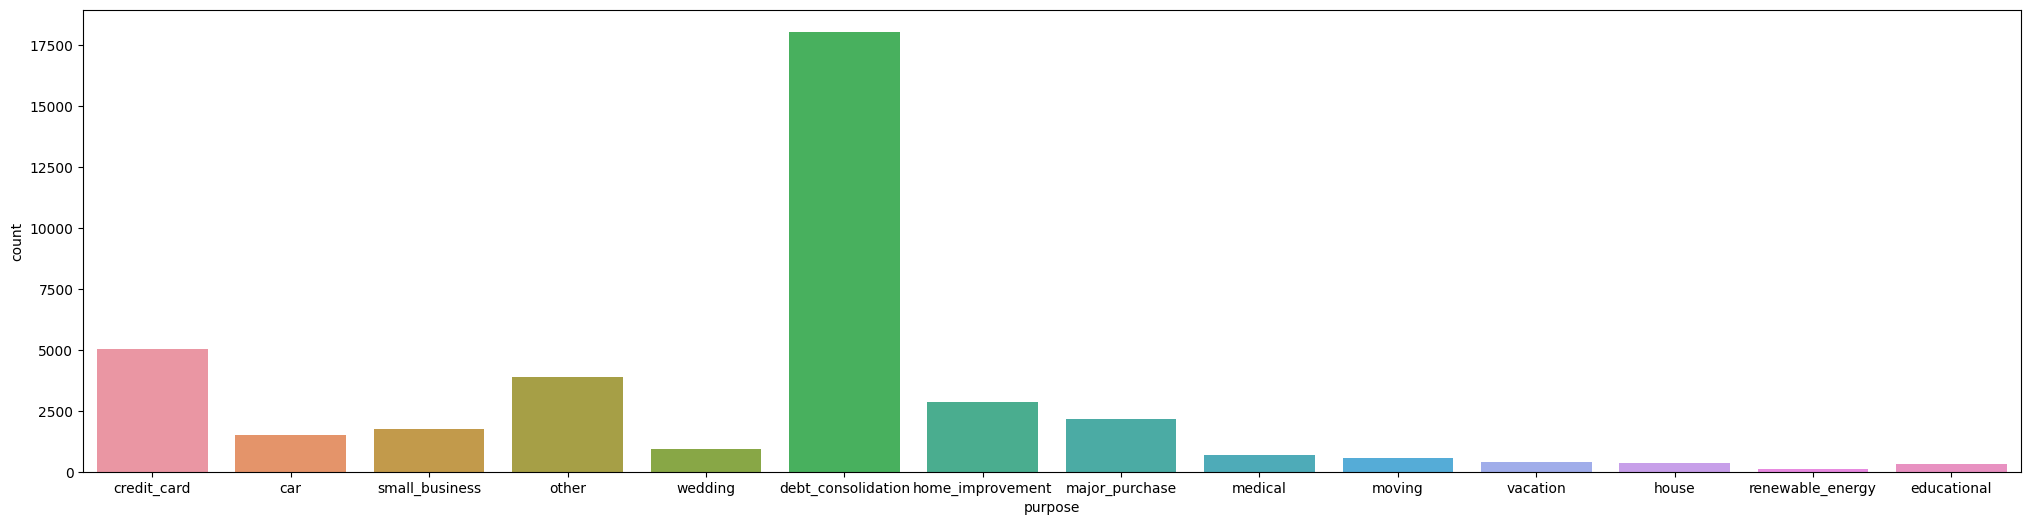

In [54]:
# lets first look at the number of loans for each type (purpose) of the loan
# most loans are debt consolidation (to repay otehr debts), then credit card, major purchase etc.
plt.figure(figsize=(25, 6))
sns.countplot(x='purpose', data=data)
plt.show()

Let's analyse the top 4 types of loans based on purpose: consolidation, credit card, home improvement and major purchase.

In [55]:
# filtering the df for the 4 types of loans mentioned above
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
data = data[data['purpose'].isin(main_purposes)]
data['purpose'].value_counts()

debt_consolidation    18055
credit_card            5027
home_improvement       2875
major_purchase         2150
Name: purpose, dtype: int64

In [56]:
# debt to income ratio (Binning)
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

data['dti'] = data['dti'].apply(lambda x: dti(x))

__*Creating a function for a bar char with y axis as loan_status and the hue as purpose where as x will be a variable.*__

In [57]:
def plot_segmented(cat_var):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cat_var, y='loan_status', hue='purpose', data=data,color="red")
    plt.show()

    


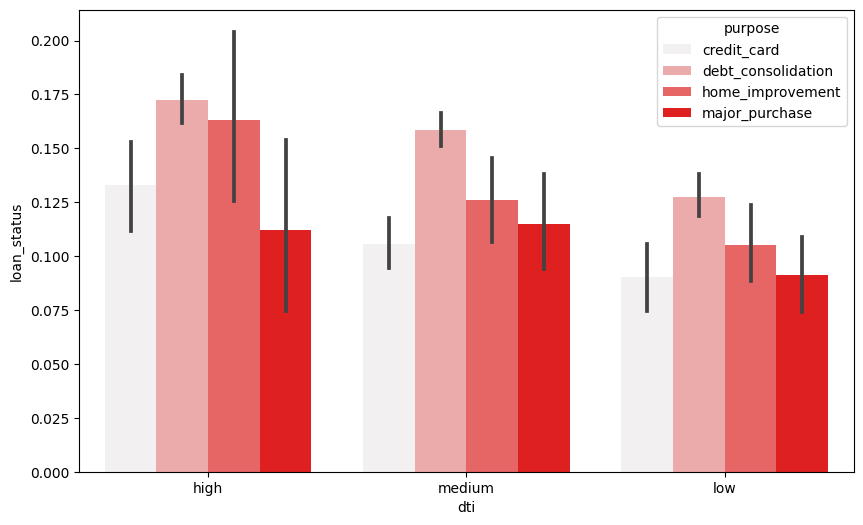

In [58]:
plot_segmented('dti')

In [59]:
data = data[~data['emp_length_years'].isnull()]

# binning the variable
def emp_length(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <=3:
        return 'junior'
    elif n > 3 and n <=7:
        return 'senior'
    else:
        return 'expert'

data['emp_length_years'] = data['emp_length_years'].apply(lambda x: emp_length(x))

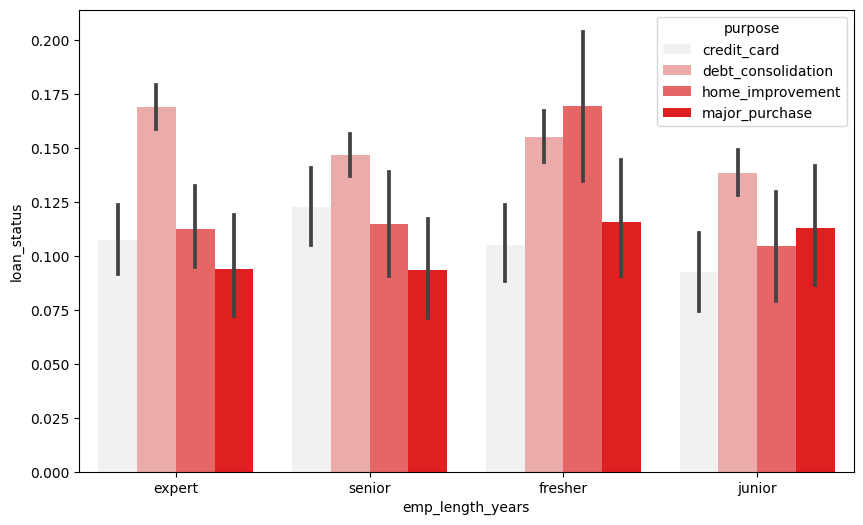

In [60]:
plot_segmented('emp_length_years')

__*In all the 4 bins we can see the debt_consolidation and home improvement being the top reasons for defaulters.*__

# Heat map 

Creating a heatmap with the correlations. 

<AxesSubplot: >

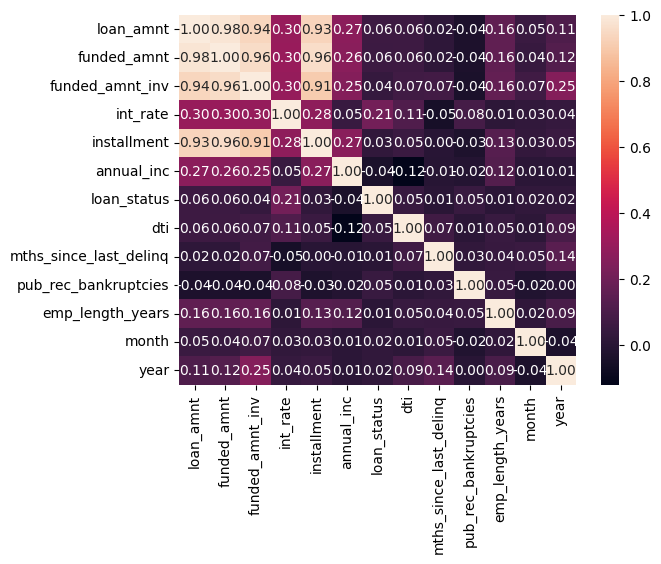

In [71]:
sns.heatmap(df2.corr(),annot=True, fmt='.2f') # heatmap from sns

In [72]:
pivot_grade=df2.pivot_table(index=['grade','sub_grade'],aggfunc='mean')
# Creating pivort tables with repective grades and sub grades.

In [73]:
pivot_grade.head()

annual_inc        dti  emp_length_years  funded_amnt  \
grade sub_grade                                                           
A     A1         67066.392318  10.753064          5.518876  7248.156277   
      A2         66229.615458  11.537076          5.181698  7238.478117   
      A3         66362.417182  12.014050          4.992265  7659.696133   
      A4         66092.153432  12.385778          4.828402  9045.161852   
      A5         67607.629834  12.530048          4.801842  9322.053407   

                 funded_amnt_inv  installment  int_rate    loan_amnt  \
grade sub_grade                                                        
A     A1             7201.887622   219.862256  5.805224  7261.040386   
      A2             7104.228077   220.458521  6.378733  7361.306366   
      A3             7365.766616   234.946746  7.164552  7886.698895   
      A4             8773.974446   277.932001  7.660428  9319.822485   
      A5             8982.315976   285.243746  8.262302  9632.955801   

                 loan_status     month  mths_since_last_delinq  \
grade sub_grade                                                  
A     A1            0.026339  7.828797               40.516484   
      A2            0.049072  7.557692               37.760181   
      A3            0.056906  7.030939               36.718213   
      A4            0.061956  7.163940               39.983553   
      A5            0.079926  7.112339               39.785829   

                 pub_rec_bankruptcies         year  
grade sub_grade                                     
A     A1                     0.000887  2010.769096  
      A2                     0.003383  2010.485411  
      A3                     0.002823  2010.259669  
      A4                     0.020049  2010.407240  
      A5                     0.022363  2010.194107

<AxesSubplot: xlabel='sub_grade', ylabel='loan_amnt'>

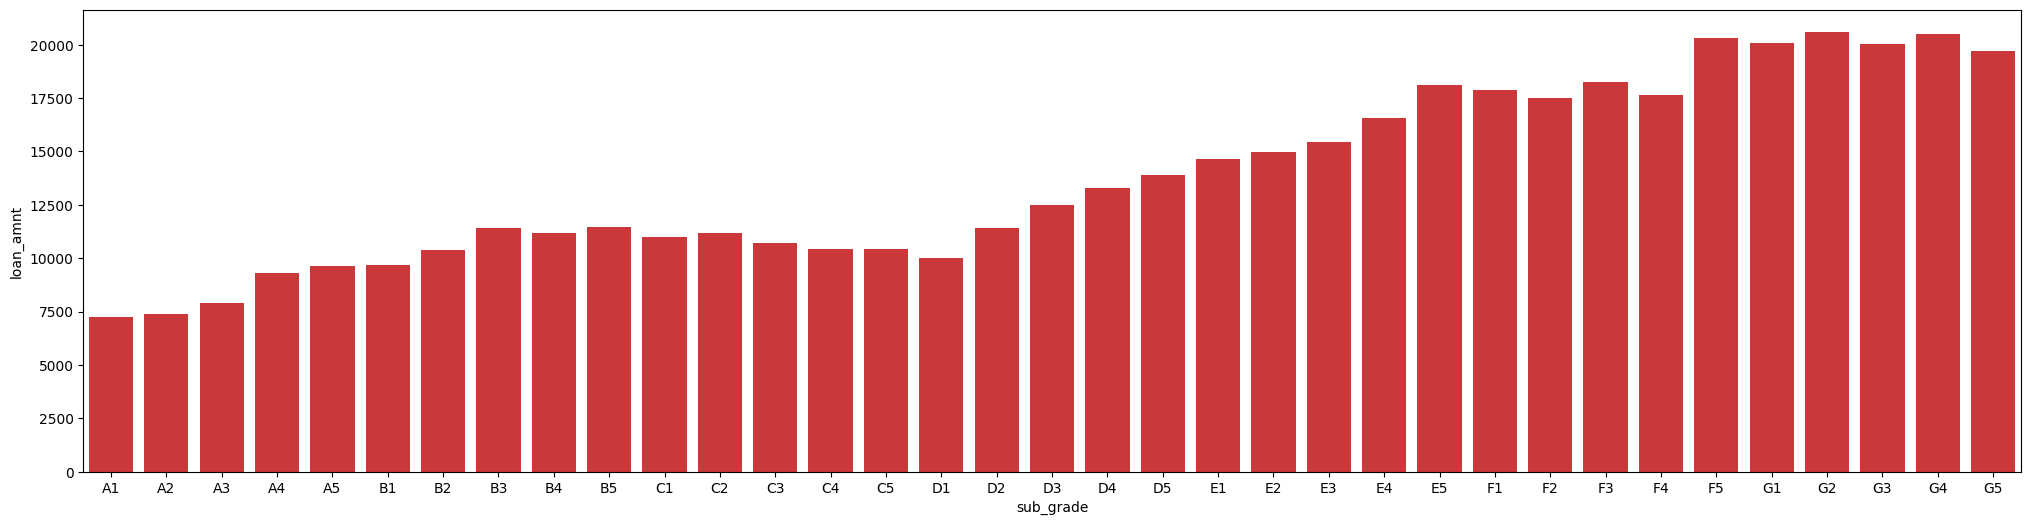

In [70]:
plt.figure(figsize=(25, 6))
sns.barplot(x=pivot_grade.index.get_level_values(1), y="loan_amnt", data=pivot_grade,color="#E32022")

__*Applicants with lower grades (G) are taking the larger loan amount s when compared to the higher grades (A)*__

# Conclusions

__The major variables which are the determining factors for an applicant to be a defaulter.__

- Interest rate
- Grade, Subgrade
- Loan Amount
- Annual Income
- Installment
- Duration
- DTI (debt to income ratio)

## Summary

__The users with High interest, Low grades or subgrades, high loan amounts, Low annual income, high dti, and users with the purpose of debt consolidation or home improvement are more likely to be the defaulters.__